<a href="https://colab.research.google.com/github/15nisha/Sentence_similarity/blob/main/Similarity_finding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from gensim.models import Word2Vec
import numpy as np
import nltk
from nltk.corpus import stopwords
import re
from scipy import spatial

import pandas as pd
import numpy as np

# # Downloading the stop words list
nltk.download('stopwords')
# # Loading the stop words in english
stop_words = set(stopwords.words('english'))

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
pip install --upgrade gensim

In [ ]:
# sentences = 'End of hope is end of life. You can not live without purpose in life.'
# model = Word2Vec(sentences)

**Importing data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
category_desc = pd.read_csv('/content/drive/MyDrive/similarity_finding/Category-Desc.csv',names=["category", "title", "description"])
google_job_des = pd.read_csv('/content/drive/MyDrive/similarity_finding/google_jobs_data_30.csv')

**Taking subset of google_job**

In [ ]:
google_jobs = google_job_des[google_job_des['category'] == "Computer and IT"].reset_index()
# description_IT = job_data[job_data['category'] == "Computer and IT"].reset_index()

In [ ]:
# google_jobs = google_job_des.head()

In [ ]:
print(category_desc.columns)
print(google_jobs.columns)

Index(['category', 'title', 'description'], dtype='object')
Index(['index', 'category', 'job_title', 'job_description'], dtype='object')


In [ ]:
 def job_cleaner(text):
        """
            text: a string
            return: cleaned initial string
        """
        text = text.replace("\n", " ")
        REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
        BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
        STOPWORDS = set(stopwords.words('english'))

        text = str(text)
        text = text.lower()  # lowercase text
        # replace REPLACE_BY_SPACE_RE symbols by space in text
        text = REPLACE_BY_SPACE_RE.sub(' ', text)
        # delete symbols which are in BAD_SYMBOLS_RE from text
        text = BAD_SYMBOLS_RE.sub('', text)
        text = ' '.join(word for word in text.split()
                        if word not in STOPWORDS)  # delete stopwords

        return text

In [ ]:
len(google_jobs)

100

In [ ]:
google_jobs.shape

(100, 4)

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords.add('•'),
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    print(wordcloud)

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    # plt.show()

In [ ]:
data = google_jobs['job_description'][2]

In [ ]:
# stopwords = nltk.corpus.stopwords.words('english')
# stopwords.append('newWord')

In [ ]:
data

'Wonder is a new kind of knowledge service that makes your brain scalable. We provide instant access to the intellect of research analysts around the world. We enable anyone - from individuals up to Fortune 500s - to gain strategic knowledge when they need it most.\n\nWe are looking for a motivated, full-time software engineer with full-stack experience - but a particular interest in / knack for backend development - to help us take Wonder to the next level.\n\nYou\'ll be brainstorming, designing and implementing ways to:\n• More efficiently route projects to analysts\n• Expand our knowledge database\n• Help clients leverage their research\n• Enable our analysts to do their best work\n• Ensure we can operate effectively at scale\n• Support your coworkers\' professional growth\n\nWe\'re passionate about what we do, always up for a challenge, and want to continue building a supportive, happy and inclusive engineering team. Does this sound like a team you\'d want to join?\n\nTo be success

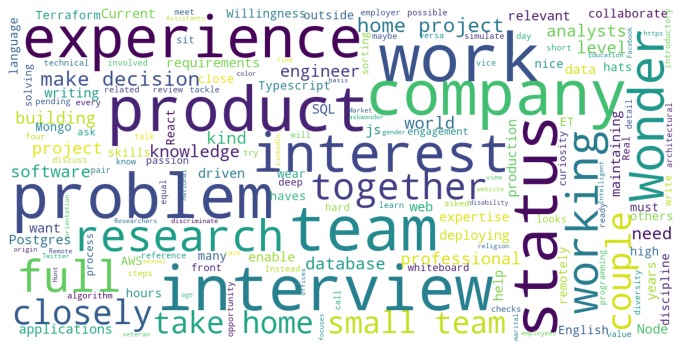

In [ ]:
show_wordcloud(data)

In [ ]:
import collections

In [ ]:
# filtered_words = [word for word in data.split() if word not in stopwords]
# counted_words = collections.Counter(filtered_words)

# words = []
# counts = []
# for letter, count in counted_words.most_common(15):
#     words.append(letter)
#     counts.append(count)

In [ ]:
def top_n_words(data):
  show_wordcloud(data)
  filtered_words = [word for word in data.split() if word not in stopwords]
  counted_words = collections.Counter(filtered_words)

  words = []
  counts = []
  for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)
  return words

**making new column of top_n_words from wordcloud**

In [ ]:
google_jobs['cloud_words'] = google_jobs['job_description'].apply(top_n_words)

In [ ]:
google_jobs.head()

,index,category,job_title,job_description,cloud_words
0,100,Computer and IT,Production Designer,"At Rockstar Games, we create the games we woul...","[design, Rockstar, work, media, digital, We, c..."
1,101,Computer and IT,Interactive Web Developer,POSITION SUMMARY Quanta Magazine seeks a talen...,"[interactive, development, web, science, diver..."
2,102,Computer and IT,Software Engineer,Wonder is a new kind of knowledge service that...,"[A, We, team, project, work, Wonder, -, (or, w..."
3,103,Computer and IT,IT Director,Position: IT Director\n\nLocation: New York Ci...,"[●, information, IT, technology, company, comp..."
4,104,Computer and IT,iOS Software Engineer,Job Description\n\nDo you want to build produc...,"[will, iOS, We, You, New, York, Times, NYT, ne..."


In [ ]:
def make_vector_text1(text):
    vector = text
    # vector.append(text.split(" "))
    model = Word2Vec(vector, min_count=1, size=300)
    # list of words
    total_words = list(model.wv.vocab)
    # adding
    one_vector = []
    for i in range(len(total_words)):
        one_vector.append(model[total_words[i]])

    sum_vector = sum(np.asarray(one_vector))
    if (len(total_words) > 0):
        feature_vec = np.divide(sum_vector, len(total_words))

    # print(one_vector)

    return feature_vec

In [ ]:
def make_vector_text2(text):
    vector = []
    vector.append(text.split(" "))
    model = Word2Vec(vector, min_count=1, size=300)
    # list of words
    total_words = list(model.wv.vocab)
    # adding
    one_vector = []
    for i in range(len(total_words)):
        one_vector.append(model[total_words[i]])

    sum_vector = sum(np.asarray(one_vector))
    if (len(total_words) > 0):
        feature_vec = np.divide(sum_vector, len(total_words))

    # print(one_vector)

    return feature_vec

In [ ]:
make_vector_text1(google_jobs['cloud_words'][0])

In [ ]:
# category_desc
description_IT = category_desc[category_desc['category'] == "Computer and IT"].reset_index()

In [ ]:
description_IT.columns

Index(['index', 'category', 'title', 'description'], dtype='object')

In [ ]:
def find_sim(text1, text2):
    test = make_vector_text1(text1)
    test2 = make_vector_text2(job_cleaner(text2))
    # test
    sim = 1 - spatial.distance.cosine(test, test2)

    if sim > 0.50:
        print(sim)
    else:
        print("No", sim)



In [ ]:
type(description_IT['description'][0])

str

In [ ]:
job_cleaner(data)

'wonder new kind knowledge service makes brain scalable provide instant access intellect research analysts around world enable anyone individuals fortune 500s gain strategic knowledge need looking motivated fulltime software engineer fullstack experience particular interest knack backend development help us take wonder next level youll brainstorming designing implementing ways efficiently route projects analysts expand knowledge database help clients leverage research enable analysts best work ensure operate effectively scale support coworkers professional growth passionate always challenge want continue building supportive happy inclusive engineering team sound like team youd want join successful role youll need 1+ years experience building data driven web applications writing requirements deploying maintaining production current relevant expertise nodejs postgres sql databases experience typescript react mongo terraform aws nicetohaves full professional english language skills willin

In [ ]:
for i in range(10):
  find_sim(google_jobs['cloud_words'][i], description_IT['description'][i])

No 0.06352110207080841
No 0.04851691052317619
No 0.08214731514453888
No -0.050565142184495926
No -0.025233307853341103
No 0.12127695977687836
No 0.015872707590460777
No 0.03418172895908356
No 0.01014005672186613
No -0.03135537728667259


In [ ]:
# without word cloud
# No 0.047939732670784
# No 0.0982481986284256
# No 0.041025009006261826
# No 0.21941524744033813
# No 0.08844565600156784